# Pymaceuticals Inc.
---

### Analysis

#Total mice tested were 248, split between male and female
#The correlation between mouse weight and the average tumor is 0.84.  There is a strong correlation between the mice's weight and the volume of the tumor
#Capomulin and Ramicane proved to be the best treatment options for tumors
 

In [455]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")


# Display the data table for preview
mouse_study_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [456]:
# Checking the number of mice.
mice_count = mouse_study_df["Mouse ID"].nunique()
mice_count

249

In [457]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [458]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [459]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [460]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_df["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [461]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem= clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":var, 
                           "Tumor Volume SDev":std, "Tumor Volume SErr":sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume SDev,Tumor Volume SErr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [462]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_oneline_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_oneline_df.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

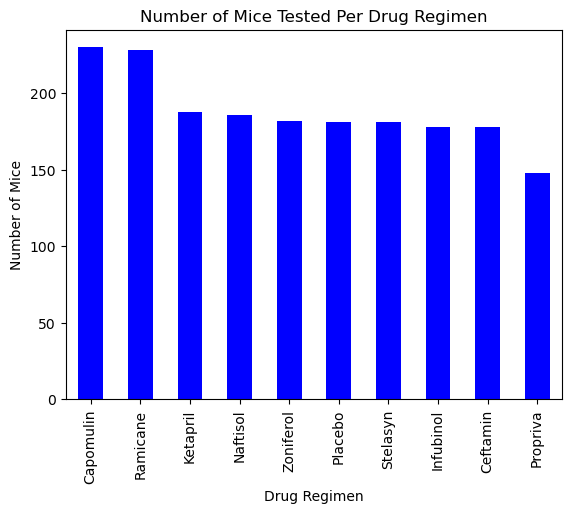

In [463]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_df["Drug Regimen"].value_counts()
bar_plot

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested Per Drug Regimen")
plot_pandas = bar_plot.plot.bar(color="b")


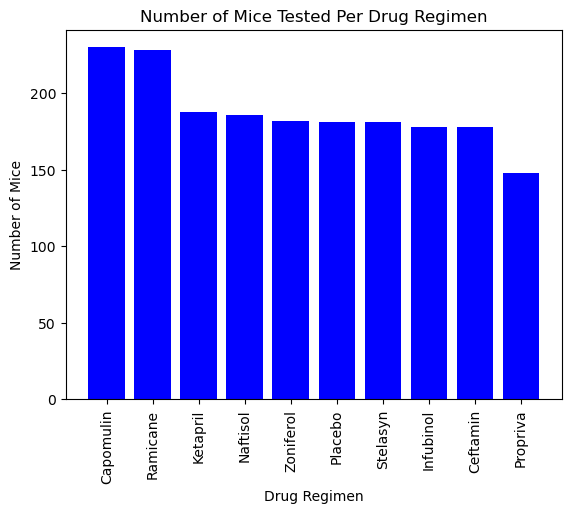

In [464]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
x_axis = bar_plot.index.values
y_axis = bar_plot.values

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested Per Drug Regimen")
plt.xticks(rotation="vertical")


plt.bar(x_axis, y_axis, color="b", align="center")
plt.show()

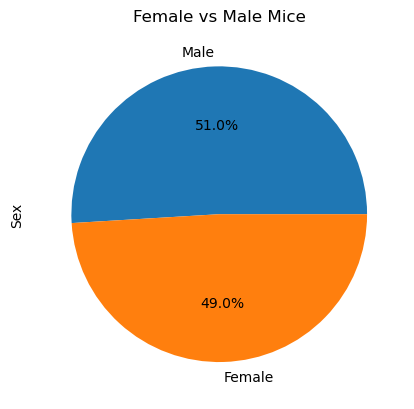

In [465]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
F_M = clean_df["Sex"].value_counts()
plt.title("Female vs Male Mice")
F_M.plot.pie(autopct= "%1.1f%%")
plt.show()

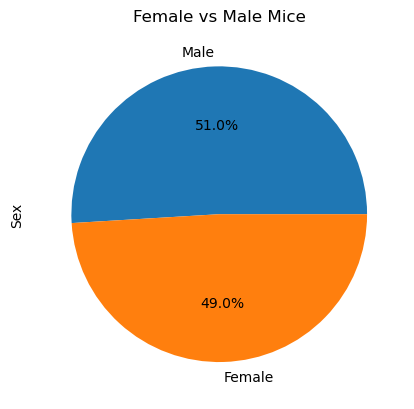

In [466]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Female", "Male"]
plt.ylabel("Sex")
plt.title("Female vs Male Mice")
plot = F_M.plot.pie(y= "Mice Totals", autopct= "%1.1f%%")
plt.show()



## Quartiles, Outliers and Boxplots

In [467]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_vol.head()


,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45


In [468]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_vol.head()

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30


In [469]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_vol.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45


In [470]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_vol.head()

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15


In [471]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugs_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = mouse_study_df[mouse_study_df["Drug Regimen"].isin(drugs_regimen)]
drugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [472]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drugs in drugs_regimen:
    print(drugs)

Capomulin
Ramicane
Infubinol
Ceftamin


In [473]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in drugs_regimen:
    quartiles = last_timepoint[drugs].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)  
    
# Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

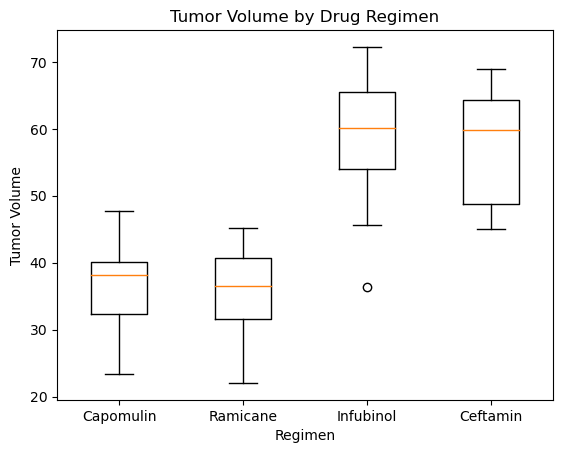

In [474]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = []
for drugs in drugs_regimen: boxplot.append(list(last_timepoint[drugs].dropna()))
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")


plt.boxplot(boxplot, labels= drugs_regimen)
plt.show()


## Line and Scatter Plots

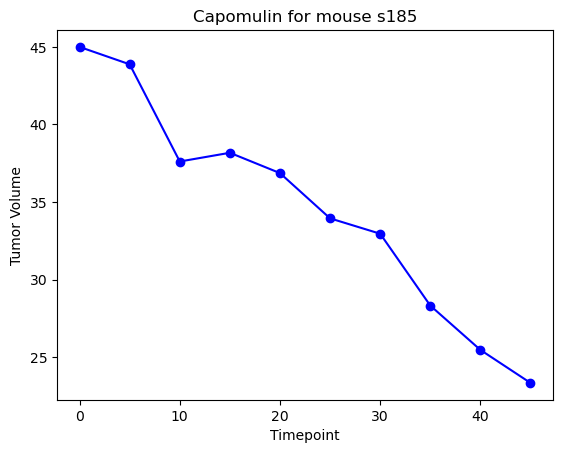

In [475]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185",:]
line_plot_df.head()

x_axis = line_plot_df["Timepoint"]
tumsiz = line_plot_df["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin for mouse s185")

plt.plot(x_axis, tumsiz, marker="o",color="blue")


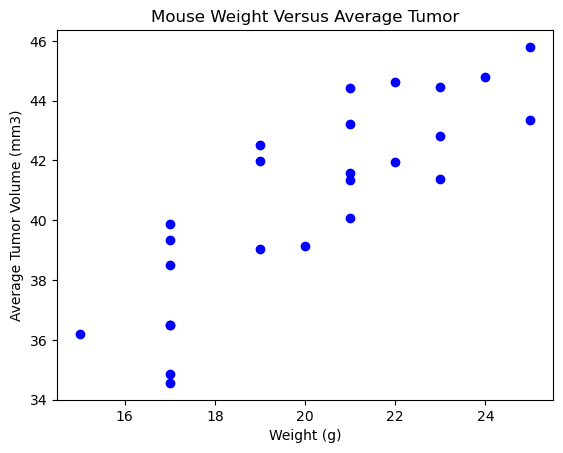

In [476]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = Capomulin_df.groupby(["Mouse ID"]).mean()

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor")

plt.scatter(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"], color="blue")


## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.84


Text(0.5, 1.0, 'Mouse Weight Versus Tumor')

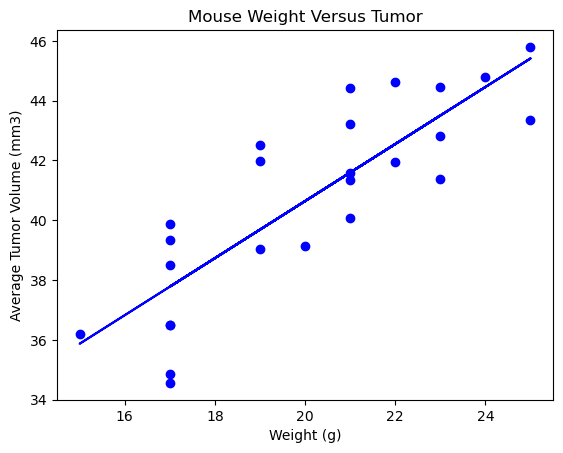

In [477]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor is {round(correlation[0],2)}")

plt.scatter(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"], color="blue")

(slope, intercept,rvalue, pvalue, stderr)= linregress(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"])
regress_values = scatter_plot["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(scatter_plot["Weight (g)"], regress_values, color = "blue")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Tumor")

